In [2]:
from config import weather_api_key
from config import g_key
import requests
import time
from datetime import datetime
import numpy as np
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
url="https://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations
lats= np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs= np.random.uniform(low=-180.000, high=180.000, size=1500)
# zip lat and longs to create a set of coordinate
lat_lngs= zip(lats, lngs)                        
lat_lngs

In [4]:
# Add latitudes and longitudes to a list
coordinates = list(lat_lngs)
# Use print function to dispaly combinations
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])                    

73.3818270226092 8.244926799455044
72.154002136457 -97.52326990423916
43.88196038239596 110.24731962253281
67.83143349859841 -17.26149040465023
41.41349179628887 -112.60253255588238
-40.86310451253023 132.81751104946613
-77.11242591983252 70.73863910517682
47.54898646599932 165.40660997904388
46.97735082867101 -86.20216100289743
-77.38451589188335 39.42510661183468
-8.628607009774427 -22.357052079069433
-78.50572684932501 161.65325850798058
-66.34509656374561 -94.1300396014711
-61.82699371611749 -118.90437838447714
79.5512970377116 -163.87692620545226
-17.280199466712176 -71.56274731368065
38.43376182260448 143.46887453125447
-16.16332469999385 -35.684761120651984
-78.82752355027759 94.71393738606656
-72.25524911961428 74.56472890245544
-1.6112009923526784 -72.49848937639102
-74.84109401581065 -153.70734608513024
-58.92370110940528 59.97570635255764
-29.501154259386205 145.941315754227
67.05849959050508 116.92247896948822
49.841705068601044 -14.715569194658457
-38.62012921056522 167.53

In [5]:
# Use the citipy module to determine the city based on latitude and longitude
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0],coordinate[1]).city_name,
         citipy.nearest_city(coordinate[0],coordinate[1]).country_code)

sorland no
thompson ca
erenhot cn
husavik is
brigham city us
port lincoln au
taolanaro mg
nikolskoye ru
marquette us
port alfred za
georgetown sh
bluff nz
punta arenas cl
rikitea pf
barrow us
punta de bombon pe
kamaishi jp
belmonte br
albany au
saint-philippe re
iquitos pe
mataura pf
taolanaro mg
dubbo au
nyurba ru
dingle ie
westport nz
rikitea pf
cape town za
illoqqortoormiut gl
kingsville us
hermanus za
punta arenas cl
hithadhoo mv
goma cd
punta arenas cl
albany au
novomykolayivka ua
coquimbo cl
albany au
hilo us
fort nelson ca
erenhot cn
ushuaia ar
tiznit ma
plettenberg bay za
ushuaia ar
attawapiskat ca
torbay ca
new norfolk au
rabaul pg
chake chake tz
cape town za
mar del plata ar
punta arenas cl
vaini to
narsaq gl
rikitea pf
lavrentiya ru
sitka us
butaritari ki
rikitea pf
bluff nz
sinnamary gf
bredasdorp za
new norfolk au
port hardy ca
saleaula ws
illoqqortoormiut gl
toliary mg
namibe ao
dalby au
ushuaia ar
leningradskiy ru
severo-kurilsk ru
llanelli gb
saleaula ws
butaritari ki
c

lompoc us
east london za
busselton au
teya ru
ushuaia ar
hilo us
udachnyy ru
aswan eg
port hedland au
hirara jp
tasiilaq gl
chuy uy
punta arenas cl
nizhneyansk ru
vaini to
ngukurr au
olafsvik is
lavrentiya ru
kihei us
khovu-aksy ru
one hundred mile house ca
gotsu jp
khatanga ru
pacific grove us
saint anthony ca
santa maria cv
grand river south east mu
punta arenas cl
busselton au
rikitea pf
te anau nz
flinders au
talnakh ru
kodiak us
georgetown sh
port-gentil ga
georgetown sh
uribia co
ust-kuyga ru
lebu cl
illoqqortoormiut gl
castro cl
atuona pf
bredasdorp za
punta arenas cl
kapaa us
illoqqortoormiut gl
kapaa us
dingle ie
belushya guba ru
atuona pf
taolanaro mg
ushuaia ar
bluff nz
kostomuksha ru
busselton au
drayton valley ca
mezen ru
vaitape pf
bluff nz
camocim br
cape town za
port alfred za
tiksi ru
yuzhne ua
ushuaia ar
saint george bm
klaksvik fo
taolanaro mg
amderma ru
pithora in
klaksvik fo
khatanga ru
yellowknife ca
barentsburg sj
oneonta us
port alfred za
khatanga ru
myre no
dzh

In [6]:
# create empty list to gather cities data
cities=[]

# Identify the nearest city for each latitdue and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

600

In [10]:
# Create an empty list to hold the weather data
city_data=[]
# Print the beginning of the logging
print("Beginning Data Retrieval   ")
print("---------------------------")

# Create counters
record_count = 1
set_count = 1

# loop through all the cities in our list
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging
    if (i % 50 == 0 and i>50):
        set_count +=1
        record_count =1
        time.sleep(10)
    # Create endpoint URL with each city
    city_url=url + "&q=" + city.replace(" ","+")
    # Log the URL, record + set numbers and city
    print(f'Processing Record {record_count} of Set {set_count}|{city}')
    # Add 1 to the record count
    record_count +=1
    
# Run an API request for each of the cities
    try:
                #Parse the JSON dn retrive the data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat= city_weather['coord']['lat']
        city_lng= city_weather['coord']['lon']
        city_max_temp= city_weather['main']['temp_max']
        city_humidity= city_weather['main']['humidity']
        city_wind= city_weather['wind']['speed']
        city_clouds= city_weather['clouds']['all']
        city_country= city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date= datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city inforomation into the city_data list.
        city_data.append({"City":city.title(),
                         "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
        })
    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that data loading is complete
print("--------------------------------")
print("Data Retrieval Complete")
print("--------------------------------")

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1|sorland
Processing Record 2 of Set 1|thompson
Processing Record 3 of Set 1|erenhot
Processing Record 4 of Set 1|husavik
Processing Record 5 of Set 1|brigham city
Processing Record 6 of Set 1|port lincoln
Processing Record 7 of Set 1|taolanaro
City not found. Skipping...
Processing Record 8 of Set 1|nikolskoye
Processing Record 9 of Set 1|marquette
Processing Record 10 of Set 1|port alfred
Processing Record 11 of Set 1|georgetown
Processing Record 12 of Set 1|bluff
Processing Record 13 of Set 1|punta arenas
Processing Record 14 of Set 1|rikitea
Processing Record 15 of Set 1|barrow
Processing Record 16 of Set 1|punta de bombon
Processing Record 17 of Set 1|kamaishi
Processing Record 18 of Set 1|belmonte
Processing Record 19 of Set 1|albany
Processing Record 20 of Set 1|saint-philippe
Processing Record 21 of Set 1|iquitos
Processing Record 22 of Set 1|mataura
Processing Record 23 of Set 1|dubbo
Processing

Processing Record 46 of Set 3|port hedland
Processing Record 47 of Set 3|sao felix do xingu
Processing Record 48 of Set 3|saskylakh
Processing Record 49 of Set 3|santa cruz
Processing Record 50 of Set 3|miri
Processing Record 1 of Set 4|cidreira
Processing Record 2 of Set 4|tuggurt
City not found. Skipping...
Processing Record 3 of Set 4|lagoa
Processing Record 4 of Set 4|abdulino
Processing Record 5 of Set 4|san quintin
Processing Record 6 of Set 4|arraial do cabo
Processing Record 7 of Set 4|talnakh
Processing Record 8 of Set 4|bonthe
Processing Record 9 of Set 4|carauari
Processing Record 10 of Set 4|esperance
Processing Record 11 of Set 4|richards bay
Processing Record 12 of Set 4|mataram
Processing Record 13 of Set 4|morant bay
Processing Record 14 of Set 4|ponta delgada
Processing Record 15 of Set 4|carnarvon
Processing Record 16 of Set 4|marawi
Processing Record 17 of Set 4|pontianak
Processing Record 18 of Set 4|shizunai
Processing Record 19 of Set 4|tianjin
Processing Record 2

Processing Record 46 of Set 7|kihei
Processing Record 47 of Set 7|khovu-aksy
Processing Record 48 of Set 7|one hundred mile house
City not found. Skipping...
Processing Record 49 of Set 7|gotsu
Processing Record 50 of Set 7|saint anthony
Processing Record 1 of Set 8|santa maria
Processing Record 2 of Set 8|uribia
Processing Record 3 of Set 8|ust-kuyga
Processing Record 4 of Set 8|kostomuksha
Processing Record 5 of Set 8|drayton valley
Processing Record 6 of Set 8|vaitape
Processing Record 7 of Set 8|camocim
Processing Record 8 of Set 8|yuzhne
Processing Record 9 of Set 8|pithora
Processing Record 10 of Set 8|oneonta
Processing Record 11 of Set 8|myre
Processing Record 12 of Set 8|dzhusaly
City not found. Skipping...
Processing Record 13 of Set 8|tumannyy
City not found. Skipping...
Processing Record 14 of Set 8|mnogovershinnyy
Processing Record 15 of Set 8|tara
Processing Record 16 of Set 8|bainbridge
Processing Record 17 of Set 8|taber
Processing Record 18 of Set 8|masalli
Processing 

Processing Record 39 of Set 11|pudozh
Processing Record 40 of Set 11|tautira
Processing Record 41 of Set 11|port keats
Processing Record 42 of Set 11|harnoli
Processing Record 43 of Set 11|port blair
Processing Record 44 of Set 11|meulaboh
Processing Record 45 of Set 11|broken hill
Processing Record 46 of Set 11|jinzhou
Processing Record 47 of Set 11|thinadhoo
Processing Record 48 of Set 11|geraldton
Processing Record 49 of Set 11|vila franca do campo
Processing Record 50 of Set 11|abonnema
--------------------------------
Data Retrieval Complete
--------------------------------


In [11]:
len(city_data)

547

In [12]:
# Convert the array of dictionaries to a Pandas Dataframe
city_data_df= pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sorland,67.6670,12.6934,52.74,83,81,8.90,NO,2022-08-07 21:26:45
1,Thompson,55.7435,-97.8558,77.16,38,75,17.27,CA,2022-08-07 21:27:19
2,Erenhot,43.6475,111.9767,66.70,53,67,8.63,CN,2022-08-07 21:27:19
3,Husavik,66.0449,-17.3389,54.03,92,100,3.18,IS,2022-08-07 21:22:50
4,Brigham City,41.5102,-112.0155,85.60,31,0,5.01,US,2022-08-07 21:27:20
5,Port Lincoln,-34.7333,135.8667,47.64,76,1,7.14,AU,2022-08-07 21:27:20
6,Nikolskoye,59.7035,30.7861,58.89,79,11,3.65,RU,2022-08-07 21:27:19
7,Marquette,46.5333,-87.6335,62.82,71,29,7.34,US,2022-08-07 21:33:47
8,Port Alfred,-33.5906,26.8910,62.19,97,100,5.01,ZA,2022-08-07 21:27:21
9,Georgetown,5.4112,100.3354,81.90,93,20,3.44,MY,2022-08-07 21:24:56


In [13]:
new_colum_order= ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [15]:
city_data_df=city_data_df[new_colum_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sorland,NO,2022-08-07 21:26:45,67.6670,12.6934,52.74,83,81,8.90
1,Thompson,CA,2022-08-07 21:27:19,55.7435,-97.8558,77.16,38,75,17.27
2,Erenhot,CN,2022-08-07 21:27:19,43.6475,111.9767,66.70,53,67,8.63
3,Husavik,IS,2022-08-07 21:22:50,66.0449,-17.3389,54.03,92,100,3.18
4,Brigham City,US,2022-08-07 21:27:20,41.5102,-112.0155,85.60,31,0,5.01
...,...,...,...,...,...,...,...,...,...
542,Jinzhou,CN,2022-08-07 21:38:09,41.1078,121.1417,70.18,75,81,11.39
543,Thinadhoo,MV,2022-08-07 21:38:09,0.5333,72.9333,81.79,73,100,7.78
544,Geraldton,AU,2022-08-07 21:38:10,-28.7667,114.6000,50.41,93,3,13.80
545,Vila Franca Do Campo,PT,2022-08-07 21:38:10,37.7167,-25.4333,72.01,88,32,6.85


In [18]:
# Create an output csv file
output_data_file= "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the Dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
# Get todays date in seconds
today=time.time()
today

1659909464.1194413

In [20]:
today=time.strftime("%x")
today

'08/07/22'

<function matplotlib.pyplot.show(close=None, block=None)>

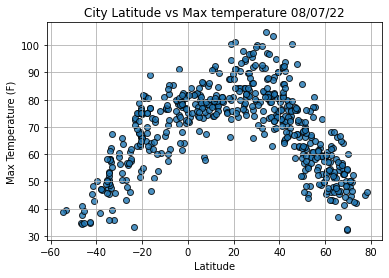

In [31]:
# Build the scatter plot for the latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the othe graph properties.
plt.title(f'City Latitude vs Max temperature ' + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

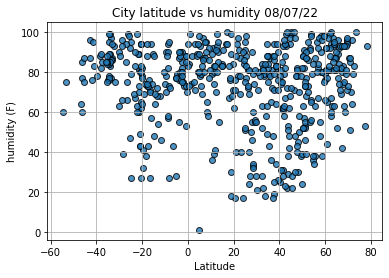

In [33]:
# Build the scatter plot for the latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the othe graph properties.
plt.title(f'City latitude vs humidity ' + time.strftime("%x"))
plt.ylabel("humidity (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

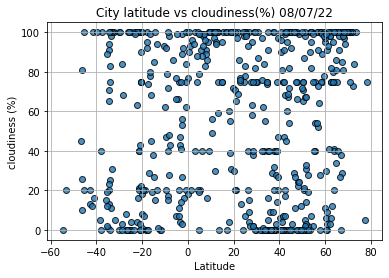

In [36]:
# Build the scatter plot for the latitude vs. cloudiness(%)
plt.scatter(lats,
           cloudiness,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the othe graph properties.
plt.title(f'City latitude vs cloudiness(%) ' + time.strftime("%x"))
plt.ylabel("cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

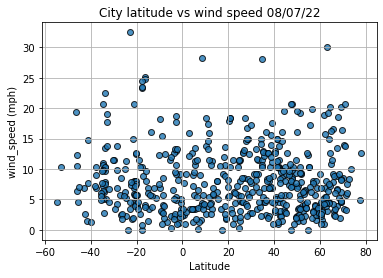

In [38]:
# Build the scatter plot for the latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the othe graph properties.
plt.title(f'City latitude vs wind speed ' + time.strftime("%x"))
plt.ylabel("wind_speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig4.png")
plt.show

In [59]:
# Create a function to perform linear regression on the weather data
#     and plot a regression line and the equation with the data.
def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):
    (slope,intercept,r_value,p_value,std_err) = linregress(x_values,y_values)
    
    regress_values= x_values*slope + intercept
    line_eq= "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [60]:
northern_hemi_df= city_data_df.loc[(city_data_df['Lat']>= 0)]

# northern_hemi_df.head()

southern_hemi_df= city_data_df.loc[(city_data_df['Lat']< 0)]

# southern_hemi_df.head()

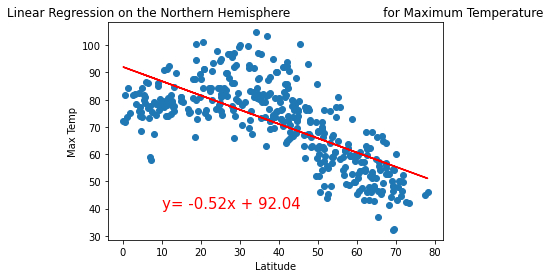

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Call the function
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(10,40))


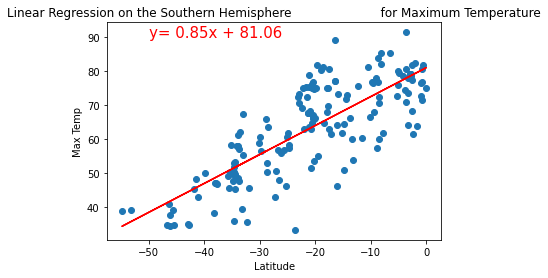

In [76]:
# Linear regression on the southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
# Call the function
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Maximum Temperature', 'Max Temp',(-50,90))


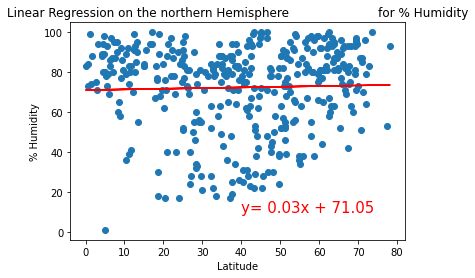

In [77]:
# Linear regression on the northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
# Call the function
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the northern Hemisphere \
                      for % Humidity', '% Humidity',(40,10))


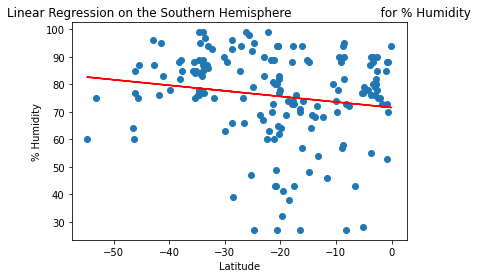

In [78]:
# Linear regression on the southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
# Call the function
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for % Humidity', '% Humidity',(-50,15))


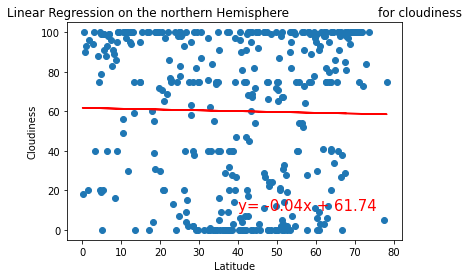

In [80]:
# Linear regression on the northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the northern Hemisphere \
                      for cloudiness', 'Cloudiness',(40,10))


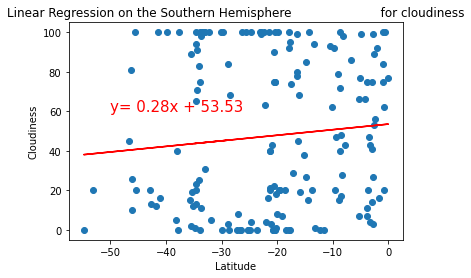

In [83]:
# Linear regression on the southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for cloudiness', 'Cloudiness',(-50,60))


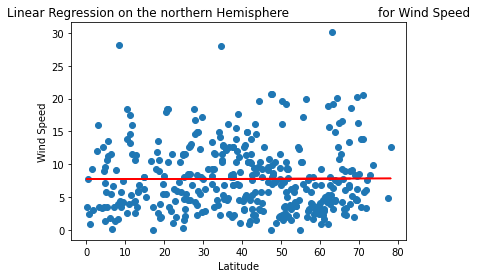

In [89]:
# Linear regression on the northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the northern Hemisphere \
                      for Wind Speed', 'Wind Speed',(40,35))


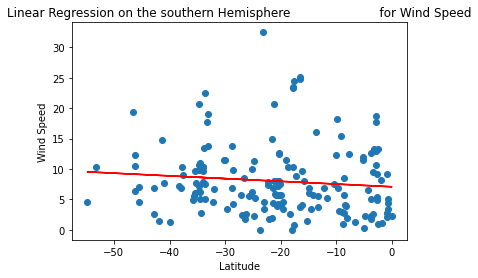

In [90]:
# Linear regression on the southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the southern Hemisphere \
                      for Wind Speed', 'Wind Speed',(-50,35))
